In [2]:
#import bibliotek
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
import xgboost as xgb
import missingno as msno

import xgboost as xgb
import missingno as msno
from tqdm import tqdm


In [3]:
#aby widac wszyskie kolumny w df
pd.set_option('display.max_columns', 500)

In [4]:
#wczytanie danych
df = pd.read_hdf("../input/train_property.h5")
df.shape

(45694, 35)

In [5]:
df.head()

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,Construction phase:,Housing class:,Elevator:,Bathroom type:,Balcony type:,Mortgage possible:,The view from the window:,Garbage chute:,Repair:,Fridge:,Phone:,Furniture:,Free layout:,It is possible to bargain:,Floor covering:,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
0,"[Москва, МЦК Лужники]","[23 февраля 2018, 133, (+2 за сегодня), Обновл...","[г. Москва, г. Москва]",[],380.610000,"secure Parking, video surveillance, 24-hour se...",Brick,apartments,new building,no fee,Commissioned,Elite class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[сегодня в 04:52, 3, (+3 за сегодня)]","[Новая Москва, п. Сосенское, п. Коммунарка, Юж...",[],8.004631,Yes,Monolithic-brick,flat,from the developer,no fee,Building walls,Comfort class,yes,separate,balcony,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Москва, МЦК Крымская, ул. Поляны]","[5 марта, 6, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, ул Поляны, г. Москва, ул Поляны]",[],6.520000,provided,Monolithic,apartments,from the developer,no fee,Finish,Comfort class,yes,combined,NaN,NaN,yard,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Москва, Беговой, м. Динамо, МЦК Хорошёво]","[22 мая 2018, 60, (+2 за сегодня), Обновлено 1...","[г. Москва, Беговой, г. Москва, Беговой]",[],20.269686,NaN,Monolithic,flat,new building,no fee,NaN,NaN,yes,NaN,loggia,yes,street,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Москва, Филёвский Парк, м. Фили, МЦК Шелепиха]","[26 декабря 2018, 13, (+1 за сегодня), Обновле...","[г. Москва, Филёвский Парк, г. Москва, Филёвск...",[],15.100880,NaN,Monolithic,apartments,secondary,no fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#kolumny w danych
df.columns

Index(['breadcrumbs', 'date', 'geo_block', 'owner', 'price', 'Security:',
       'Building type:', 'Object type:', 'Ad type:', 'Commission agent:',
       'Construction phase:', 'Housing class:', 'Elevator:', 'Bathroom type:',
       'Balcony type:', 'Mortgage possible:', 'The view from the window:',
       'Garbage chute:', 'Repair:', 'Fridge:', 'Phone:', 'Furniture:',
       'Free layout:', 'It is possible to bargain:', 'Floor covering:',
       'Room type:', 'Internet:', 'Kitchen furniture:', 'TV:',
       'Washing machine:', 'Foundation type:', 'Overlap type:',
       'Type of the building:', 'Playground:', 'Class:'],
      dtype='object')

In [7]:
#przykladowe 5 cen
df["price"].sample(5)

38297     8.967
6587     15.410
3794     11.310
1298     21.860
41730    22.480
Name: price, dtype: float64

In [8]:
df["price"].describe()

count    45694.000000
mean        17.422577
std         38.332439
min          0.820018
25%          7.173917
50%          9.910000
75%         15.405717
max       3000.000015
Name: price, dtype: float64

<AxesSubplot:>

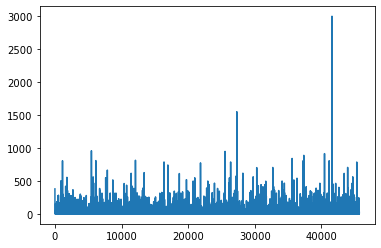

In [9]:
df["price"].plot()

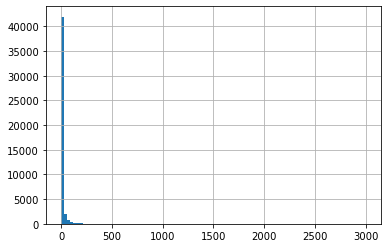

In [10]:
#histogram
df["price"].hist(bins=100);

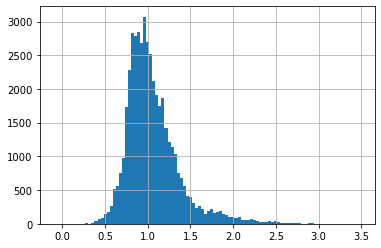

In [11]:
np.log10(df["price"]).hist(bins=100);

In [12]:
price_mean = df["price"].mean()
price_mean

17.422576928787148

In [13]:
df["price_pred"] = price_mean

In [14]:
mean_absolute_error(df["price"],df["price_pred"])

13.030922906892457

In [15]:
price_median= df["price"].median()
price_median

9.91

In [16]:
df["price_pred_median"] = price_median

In [17]:
mean_absolute_error(df["price"],df["price_pred_median"])

10.33542636451175

In [19]:
X = df.values
y = df["price"].values

In [18]:
def run_model (model, X,y):
    model.fit(X,y)
    y_pred = model.predict(X)
    
    return mean_absolute_error(y,y_pred)

In [20]:
run_model(DummyRegressor(strategy='mean'),X,y)

13.030922906892457

In [21]:
run_model(DummyRegressor(strategy='median'),X,y)

10.33542636451175